In [43]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
# using this to show stats such as the correlation coefficient between 2 variables
import scipy.stats as stats
# need this to explicitly register converters for future version of panda
from pandas.plotting import register_matplotlib_converters
print("Setup Complete")

Setup Complete


In [44]:
# Path of the file to read.  Note to self: current path is the path of jupyter files(which is C:\Users\jklopfen)
filepath = "./Documents/AAAA-DATA-WRANGLING/4-Data-Prep-Homework/Olympic_Data_fixed.csv"

#explicitly register matplotlib converters - required in future versions of panda
register_matplotlib_converters()

# Read the file into a variable fifa_data
olympic_data = pd.read_csv(filepath)
print("Done")

Done


In [32]:
# See what variables/columns we're working with. Ensure all columns have underscores for spaces, for working with later
olympic_data.columns

Index(['Name', 'Age', 'Height_cm', 'Weight', 'Sex', 'birth_date',
       'birth_place', 'Gold', 'Silver', 'Bronze', 'Total', 'Sport', 'Event'],
      dtype='object')

In [46]:
# Set the input variable X to Names and look for evidence of duplicate entries

X = olympic_data.Name
print(X.describe())

count                73
unique               73
top       Clark Burckle
freq                  1
Name: Name, dtype: object


In [45]:
# Remove Dupes and replay the previous cell
olympic_data.drop_duplicates(subset = "Name", 
                     keep = False, inplace = True)

In [47]:
# Get summary of the whole dataframe.  Also check Count for evidence of missing values and fix, and repull csv into pandas
# and recheck
# Fix depends on what want to do.  Either impute with value as/if it makes sense and document(remember how values affect the mean) 
# or remove
# If remove, use pandas' "dropna" method (refer back to my kaggle dataprep notebook), and document.
olympic_data.describe()

,Age,Height_cm,Weight,Gold,Silver,Bronze,Total
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,25.164384,173.356164,76.917808,0.301370,0.191781,0.136986,0.630137
std,7.877559,37.513838,12.852533,0.593599,0.461204,0.346212,1.034231
min,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,173.000000,66.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,183.000000,77.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,188.000000,88.000000,0.000000,0.000000,0.000000,1.000000
max,46.000000,203.000000,104.000000,2.000000,2.000000,1.000000,5.000000


In [48]:
# Check for misspelled and abbreviated values in each column using pandas' value_counts()
# also can check for missing values using the dropna=False arg
# also can use the additional sort method to make it visually easier
# Fix/remove as appropriate, and repull csv into pandas, and redo
olympic_data["Sport"].value_counts(dropna=False).sort_index()

Beach Volleyball     7
Shooting            17
Swimming            45
Table Tennis         4
Name: Sport, dtype: int64

In [49]:
# Print the first 5 rows of the data
olympic_data.head()

,Name,Age,Height_cm,Weight,Sex,birth_date,birth_place,Gold,Silver,Bronze,Total,Sport,Event
0,Cammile Adams,20,173,65,F,9/11/1991,Houston (USA),0,0,0,0,Swimming,Women's 200m Butterfly
1,Nathan Adrian,23,201,102,M,12/7/1988,Bremerton (USA),1,1,0,2,Swimming,"Men's 100m Freestyle, Men's 4x100m Freestyle R..."
4,Haley Anderson,20,178,68,F,11/20/1991,Santa Clara (USA),0,0,0,0,Swimming,Women's 10km Marathon
5,Amanda Furrer,0,168,56,F,1/17/1991,Spokane (USA),0,0,0,0,Shooting,Women's 50m Rifle 3 Positions
6,Ariel Hsing,16,165,54,F,11/29/1995,Fremont (USA),0,0,0,0,Table Tennis,"Women's Singles, Women's Team"


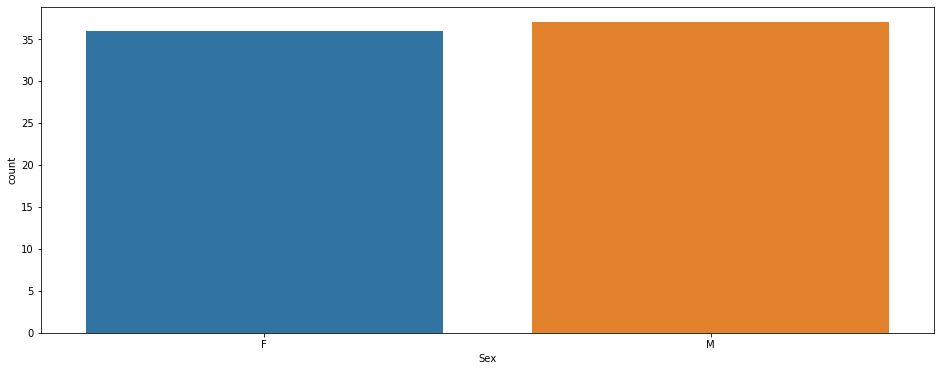

In [42]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Seaborn bar chart showing Male vs Female athletes 
X = olympic_data["Sex"]
sns.countplot(X)

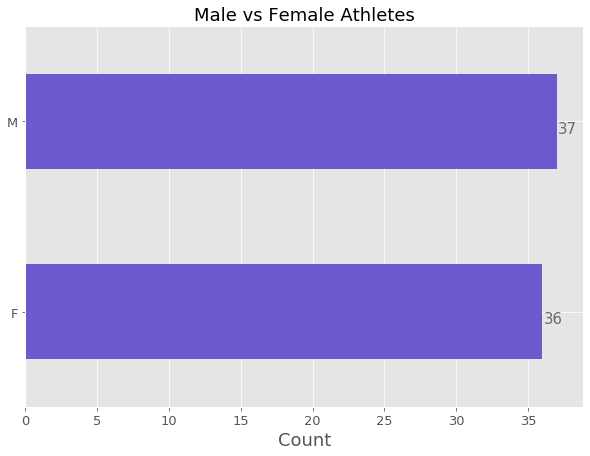

In [52]:
# Another version using matplotlib for the labels
# sex = olympic_data[olympic_data['Sex'].str.contains("loss", na=False)]

ax = olympic_data['No_Salt'].plot(kind='barh', figsize=(10,7),
                                                 color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Male vs Female Athletes", fontsize=18)
ax.set_xlabel("Count", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

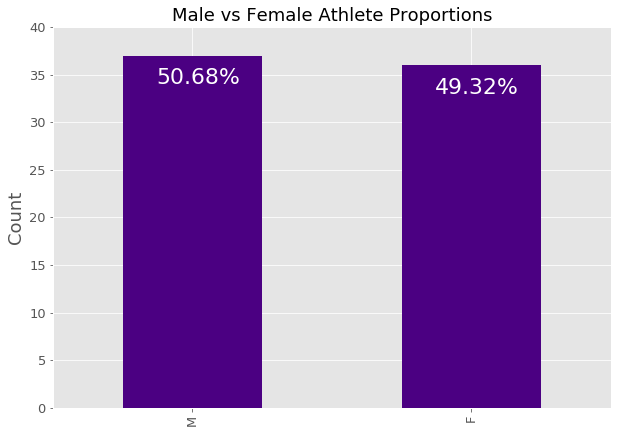

In [56]:
# Another version with matplotlib for labels, plus showing percentage proportions

ax = olympic_data['Sex'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Male vs Female Athlete Proportions", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


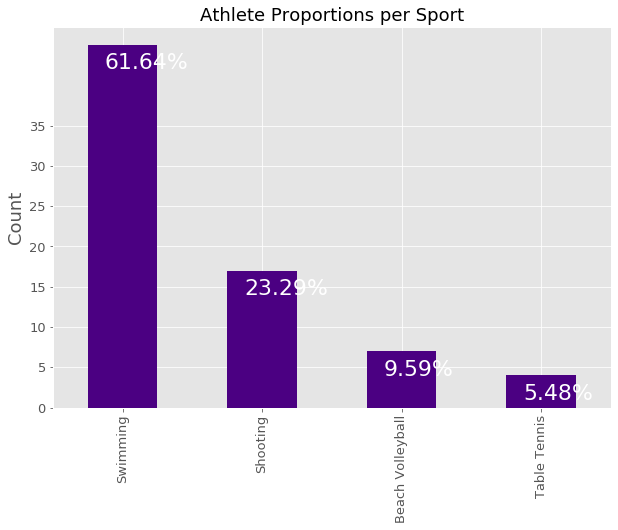

In [57]:
# Same thing, but looking for percentage of another column/attribute/variable/feature (Sport)

ax = olympic_data['Sport'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Athlete Proportions per Sport", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

<Figure size 1152x432 with 0 Axes>

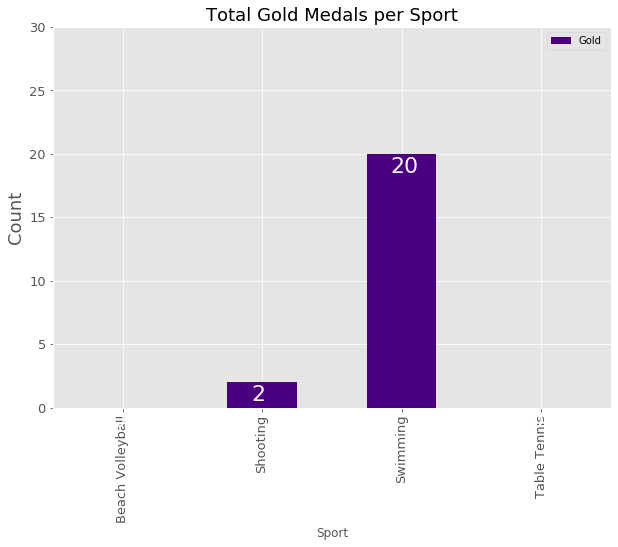

In [107]:
# Plotting the Total Sum of a specific column/attribute/axis/variable/feature per another (Total Golds per Sport)

# Set the width and height of the figure
plt.figure(figsize=(16,6))

# So this is Summ'ing the Gold feature column/index, per the Sport column. Could also groupby a list
ax = olympic_data.groupby('Sport')[["Gold"]].sum().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);

ax.set_alpha(0.8)
ax.set_title("Total Gold Medals per Sport", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25, 30])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.17, i.get_height()-1.5, \
            str(round((i.get_height()), 2)), fontsize=22,
                color='white')


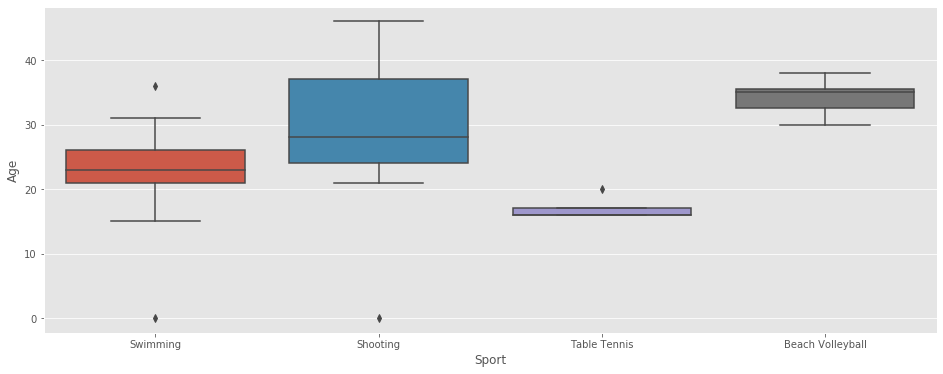

In [110]:
# Analyzing Ages per Sport

# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Analyze the relationship between Sport and Age
sns.boxplot(x=olympic_data.Sport, y=olympic_data.Age)

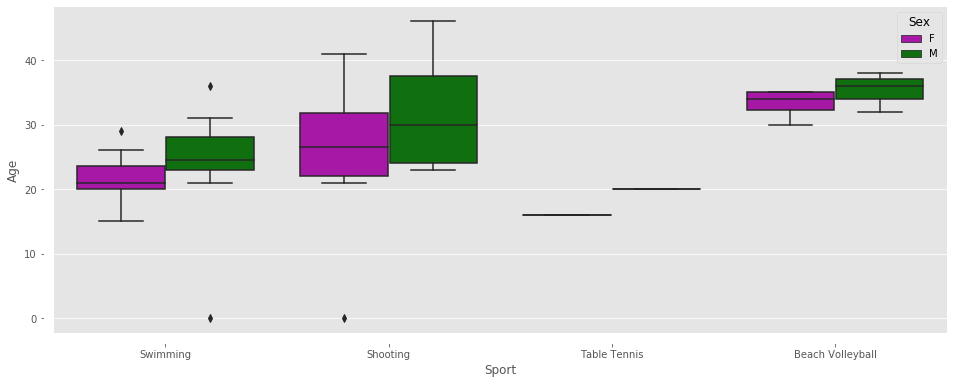

In [111]:
# Analyzing Ages per Sport, by Gender

# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Analyze the relationship between Sport and Age
sns.boxplot(x=olympic_data.Sport, y=olympic_data.Age,
            hue=olympic_data.Sex, palette=["m", "g"],)
sns.despine(offset=10, trim=True)